# Bitcoin Data Exploration and Prediction

Bitcoin (₿) is a decentralized virtual currency which operates anonymously and not surveilled by central bank or any administrator. It can also be sent on the peer-to-peer network directly. Every transaction is substantiated by networking nodes via cryptography and documented in a public distributed ledger which is called blockchain.

The creator of Bitcoin, Satoshi Nakamoto, launched Bitcoin in 2009 and executed the software as open-source code. Bitcoin has evolved from the word on the paper to a well-known cryptocurrency nowadays. According to the study by the University of Cambridge in 2017, there were approximately 2.9 to 5.8 million of distinctive cryptocurrency wallet holders and loads of them were holding Bitcoin.

Since Bitcoin has become a mainstream of investment and illegal transactions, such as money laundering and price manipulation. However, different economists have distinguished it as a economic bubble at numerous times and some regulatory organizations have announced the investor caution about bitcoin.

In this project, I will investigate the Bitcoin historical price data. In particular, I am interested in the future price of Bitcoin. Will the price continue to gain or lose?


In [1]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt # for plotting the graph

# For timestamp
from datetime import datetime

# plt.style.available 
# make it look nice
%matplotlib inline
plt.style.use("fivethirtyeight")

import random
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the dataset
# Data adapted from https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv

df = pd.read_csv(r'/work/coin_Bitcoin.csv', index_col=0, parse_dates=True)
df.head()

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [3]:
# From:
# https://docs.python.org/3/library/datetime.html
# Create series of date
df['Date'] = pd.to_datetime(df['Date'], format= "%Y-%m-%d")
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [4]:
# Checking the dimensionality of the dataframe.
df.shape

(2862, 11)

In [5]:
# Checking if there is any missing values in the data.
df.isnull().sum()

Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
month        0
year         0
dtype: int64

In [6]:
# Checking which entries in a dataframe are NA value
df.isna().any()

Name         False
Symbol       False
Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Marketcap    False
month        False
year         False
dtype: bool

In [7]:
# Getting the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2862 entries, 1 to 2862
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       2862 non-null   object        
 1   Symbol     2862 non-null   object        
 2   Date       2862 non-null   datetime64[ns]
 3   High       2862 non-null   float64       
 4   Low        2862 non-null   float64       
 5   Open       2862 non-null   float64       
 6   Close      2862 non-null   float64       
 7   Volume     2862 non-null   float64       
 8   Marketcap  2862 non-null   float64       
 9   month      2862 non-null   int64         
 10  year       2862 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 268.3+ KB


In [8]:
# To see the statistical details of the dataset.
df.describe()

,High,Low,Open,Close,Volume,Marketcap,month,year
count,2862.000000,2862.000000,2862.000000,2862.000000,2.862000e+03,2.862000e+03,2862.000000,2862.000000
mean,4974.040239,4695.103027,4836.306834,4852.092547,8.978475e+09,8.591622e+10,6.587352,2016.736548
std,7188.836678,6667.197596,6933.573446,6975.105869,1.658135e+10,1.287414e+11,3.455295,2.282967
min,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08,1.000000,2013.000000
25%,426.047752,415.675751,421.204506,420.989243,2.786250e+07,5.988997e+09,4.000000,2015.000000
50%,1197.334961,1164.174988,1180.100037,1182.809998,3.301950e+08,1.924238e+10,7.000000,2017.000000
75%,8138.046589,7703.357500,7924.612338,7926.696939,1.296743e+10,1.387658e+11,10.000000,2019.000000
max,58330.572142,55672.609513,57532.738864,57539.943668,3.509679e+11,1.072263e+12,12.000000,2021.000000


We can see the data information above has no missing and in the data form we want.
Therefore, we can move on to the next step for further data exploration.

We extract the data from 1st Jan 2015 to 31st Dec 2020.

In [9]:
# From:
# https://stackoverflow.com/questions/466345/converting-string-into-datetime
# https://www.geeksforgeeks.org/boolean-indexing-in-pandas/
# Converting Date that is in string/object datatype to datetime datatype.
# Set the desired start date and end date to filter df by using a boolean mask.

df['Date'] = pd.to_datetime(df['Date'])
start_date = '2015-01-01'
end_date = '2020-12-31'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df = df.loc[mask]
df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,month,year
SNo,,,,,,,,,,,
613,Bitcoin,BTC,2015-01-01 23:59:59,320.434998,314.002991,320.434998,314.248993,8.036550e+06,4.297536e+09,1,2015
614,Bitcoin,BTC,2015-01-02 23:59:59,315.838989,313.565002,314.079010,315.032013,7.860650e+06,4.309551e+09,1,2015
615,Bitcoin,BTC,2015-01-03 23:59:59,315.149994,281.082001,314.846008,281.082001,3.305440e+07,3.846270e+09,1,2015
616,Bitcoin,BTC,2015-01-04 23:59:59,287.230011,257.612000,281.145996,264.195007,5.562910e+07,3.616321e+09,1,2015
617,Bitcoin,BTC,2015-01-05 23:59:59,278.341003,265.084015,265.084015,274.473999,4.396280e+07,3.758098e+09,1,2015
...,...,...,...,...,...,...,...,...,...,...,...
2799,Bitcoin,BTC,2020-12-26 23:59:59,26718.070893,24522.689482,24677.016056,26437.037509,4.833265e+10,4.912509e+11,12,2020
2800,Bitcoin,BTC,2020-12-27 23:59:59,28288.840022,25922.769765,26439.373289,26272.294567,6.647990e+10,4.882133e+11,12,2020
2801,Bitcoin,BTC,2020-12-28 23:59:59,27389.112064,26207.639931,26280.821415,27084.807886,4.905674e+10,5.033393e+11,12,2020


## The Importance of Closing Price
The closing price is the raw price of the last transacted price before the market officially closes during the regular trading day. It is usually used as reference point by investors, traders and other stakehodlers for deciding performance voer a particular period. It has also been considered as the most precise valuation of a cryptocurreny or stock until trading resumes on the next trading day.

Therefore, closing price will be the target of data exploration over time.

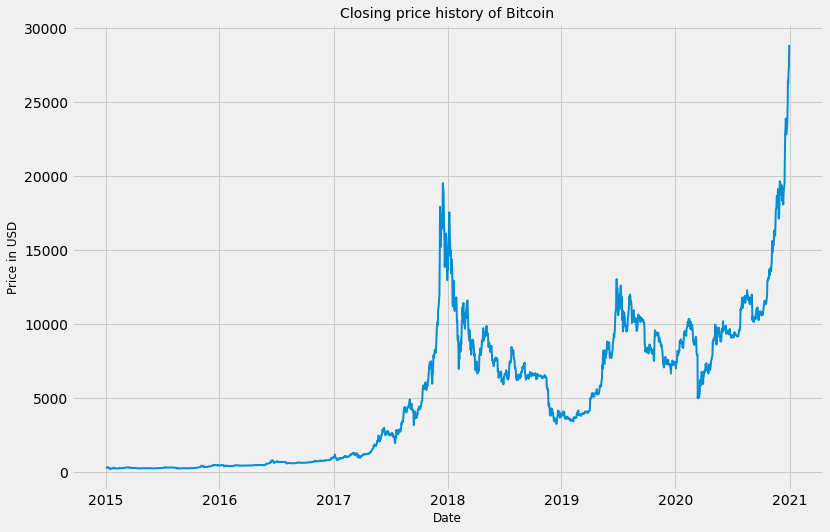

In [10]:
# Plotting out the Closing price of Bitcoin
# Converting to datetime object
df["Date"] = pd.to_datetime(df.Date, format = "%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize = (12,8))
plt.plot(df["Close"], linewidth=2)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Price in USD', fontsize = 12)
plt.title("Closing price history of Bitcoin", fontsize = 14)
plt.show()

We can see that the figure has plotted out the detail of historical closing price in the previous 6 years. The price of bitcoin has increased rapidly to approximately 20000 USD in the fall of 2017 and 30000 USD in 2020. 

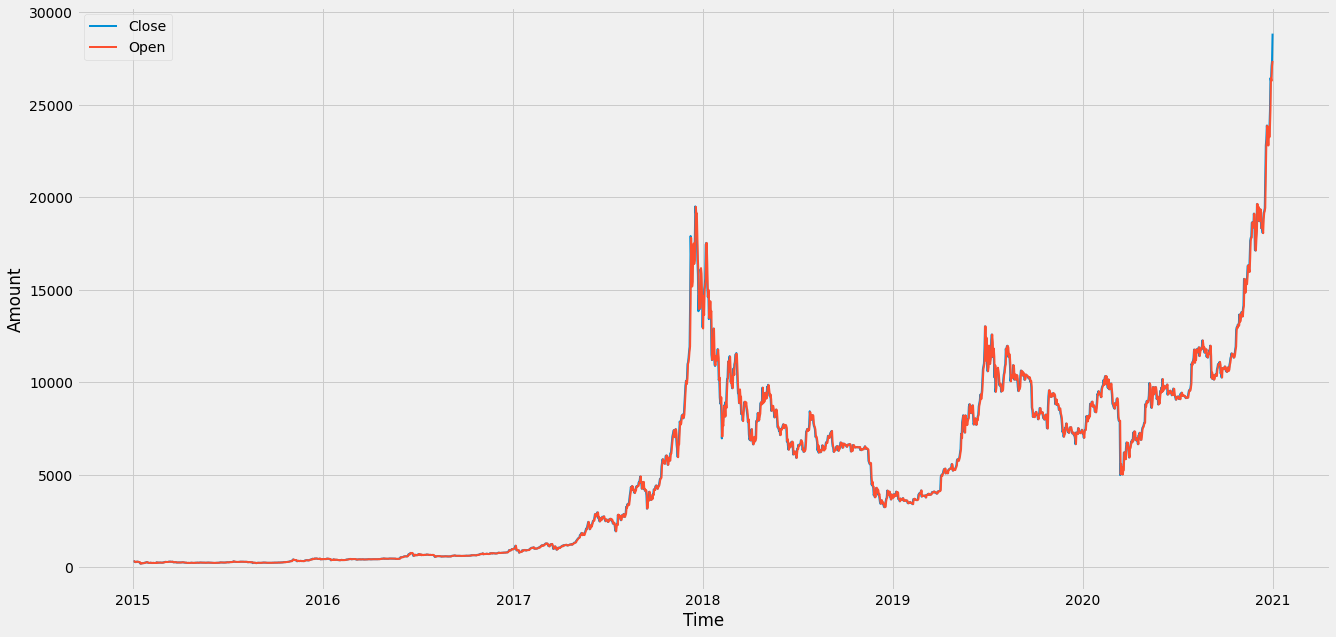

In [11]:
# Comparing the opening price and closing price to point out if there is difference.
# Visualising the opening price and closing price
plt.figure (figsize = (20, 10))
plt.plot(df['Date'], df['Close'], label = 'Close', linewidth=2)
plt.plot(df['Date'], df['Open'], label = 'Open', linewidth=2)

plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

## Candlestick chart
Candlestick chart is a method of financial chart used to visualise and analysise the price movements over time for stocks, currencies etc. Each candlestick represents the price movements of a trading day. It can spot out the opening and closing prices, highs and lows, and volumes of an asset for a particular time frame.

The candlestick chart uses candle-like symbols to display multiple price information such as open price, close price, high and low prices. Each symbol represents the compressed business activity of a single time period (one minute, one hour, one day, one month, etc.). Each candle symbol is drawn along the time scale on the x-axis to show trading activity over a period of time.

The main rectangle of the symbol is called the body of the real number, which is used to display the range between the opening price and the closing price of the time period. The lines extending from the lower and upper parts of the actual object are called lower shadows and upper shadows. Each shade represents the highest or lowest price traded during the represented time period. When the market is bullish (the closing price is higher than the opening price), the main body is usually white or green. But when the market is bearish (the closing price is lower than the opening price), the entity is usually black or red.


Moreover, candlestick charts are effective for identifying and anticipating market trends over time, as well as analyzing the market's day-to-day emotions by the coloration and form of each candlestick sign. The greater the selling or purchasing pressure, for example, the longer the body is. A short body, on the other hand, indicates that there was minimal price movement throughout that time period and implies consolidation.

Candlestick charts help reveal the psychology of the market (the fear and greed that buyers and sellers experience) through various indicators (such as shapes and colors) and many identifiable patterns that can be found on candlestick charts. There are a total of 42 recognized modes, divided into simple modes and complex modes. These patterns on candlestick charts are useful for showing price relationships and can be used to predict future market trends.


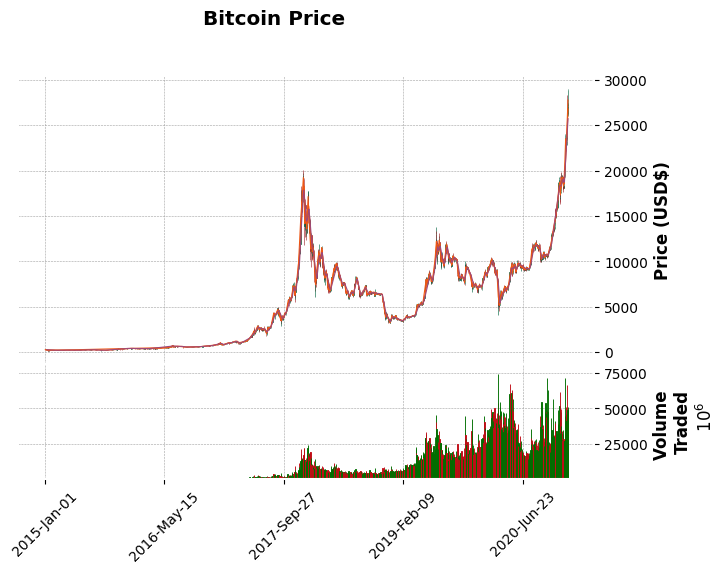

<Figure size 2000x1000 with 0 Axes>

In [12]:
# From:
# https://coderzcolumn.com/tutorials/data-science/candlestick-chart-in-python-mplfinance-plotly-bokeh
# Plotting out the Bitcoin price in Candlestick Chart
!pip install mplfinance
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.dates as mpl_dates

df_dates = df.set_index('Date')
mpf.plot(df_dates, type = 'candle', style = 'charles',
        title = 'Bitcoin Price',
        ylabel = 'Price (USD$)',
        volume = True,
        ylabel_lower = 'Volume \nTraded',
        mav = (3,6,9))
plt.figure(figsize = (20, 10))
plt.show()

## Market Capitalization
Market capitalization refers to the total market value in dollars of the company's outstanding shares. Commonly referred to as "market cap", it is calculated by multiplying the total number of issued shares of the company by the current market price of a share.

For example, a company with 10 million shares at a price of 100 dollars per share will have a market value of 1 billion dollar. The investment community uses this number to determine the size of the company, rather than using sales or total assets figures. In an acquisition, the market value is used to determine whether the acquisition candidate is of good value to the acquirer.

In cryptocurrency, the market value is calculated by multiplying the total number of coins mined by the price of a single coin at any given time.

One way of looking at market value is to roughly measure the degree to which the asset is likely to be stable. (It is important to note that even with the largest market value of a cryptocurrency, Bitcoin can still fluctuate.) But just as a larger ship can safely sail in bad weather, a cryptocurrency with a larger market value is more stable for investments much less than market value. In contrast, digital currencies with smaller market caps are more susceptible to the vagaries of the market and can see big gains or huge losses.


The formula for market capitalization is:

 <em><h4><center>Market cap = market value x no. of shares outstanding</center></h4></em>

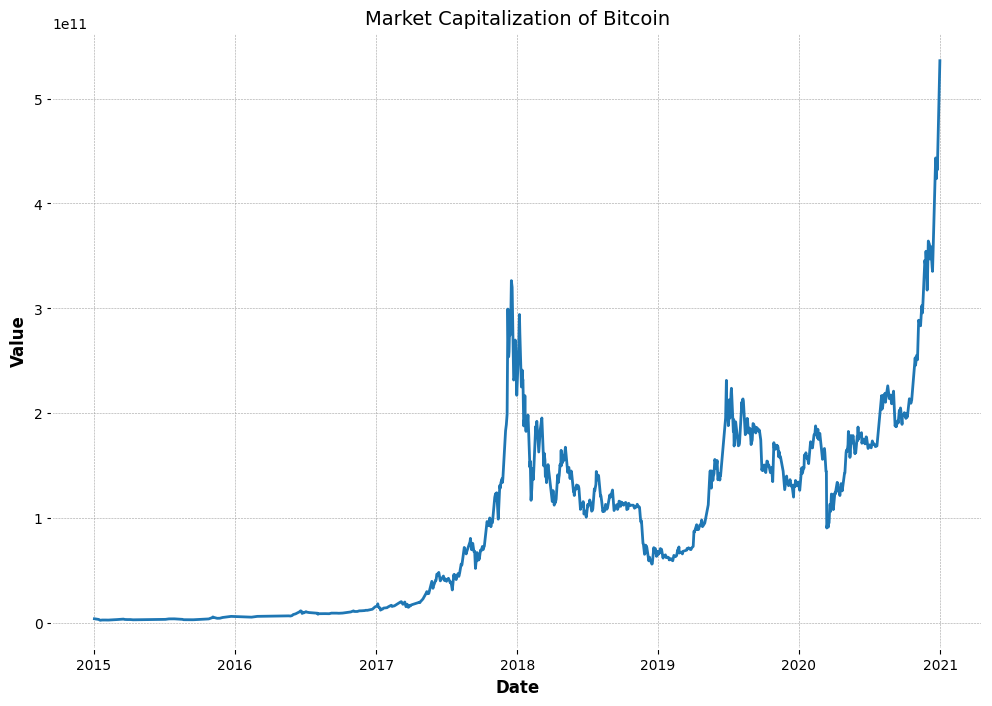

In [13]:
# Plotting out the Market Capitalization of Bitcoin
df["Date"] = pd.to_datetime(df.Date, format = "%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize = (12,8))
plt.plot(df["Marketcap"])
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Value', fontsize = 12)
plt.title("Market Capitalization of Bitcoin", fontsize = 14)
plt.show()

### What can we do with market cap?
Market value allows you to compare the total value of one cryptocurrency to the total value of another cryptocurrency to make more informed investment decisions. Cryptocurrencies are divided into three categories based on their market value:


**Large cryptocurrencies**, including Bitcoin and Ethereum, with a market value of more than 10 billion US dollars. Investors consider them lower-risk investments because they have a good growth record and often have higher liquidity, which means they can support more people withdrawing cash without having a significant impact on prices. 

The market value of **mid-range cryptocurrencies** is between USD 1 billion and USD 10 billion; They are generally considered to have more untapped upside potential, but they also carry higher risks. 


**Small cryptocurrencies** have a market value of less than $ 1 billion and are more susceptible to fluctuations in market sentiment.


The market capitalization is a useful indicator for comparing the total value of cryptocurrencies, but when weighing any investment risk, you should consider market trends, the stability of the cryptocurrencies, and your own financial situation.



# Time Series Analysis

In mathematics, a time series is a series of data points indexed (or numbered or plotted) in chronological order. Most commonly, a time series is a series obtained at equally spaced consecutive time points. Therefore, it is a series of discrete time data.

Time series analysis includes methods for analyzing time series data to extract meaningful statistical information and other characteristics from the data. Time series forecasting is a method of using a model to predict future values ​​based on previously observed values.

Time series analysis techniques can be divided into parametric methods and non-parametric methods. The parametric method assumes that the basic fixed random process has a certain structure and can be described with a small number of parameters.

### Seasonal Decompose

**Additive Model:**

***<div align="center">y(t) = BaseLevel + Trend + Seasonality + Noise</div>***


**Multiplicative Model:**

***<div align="center">y(t) = BaseLevel * Trend * Seasonality * Noise</div>**

<AxesSubplot:xlabel='Date'>

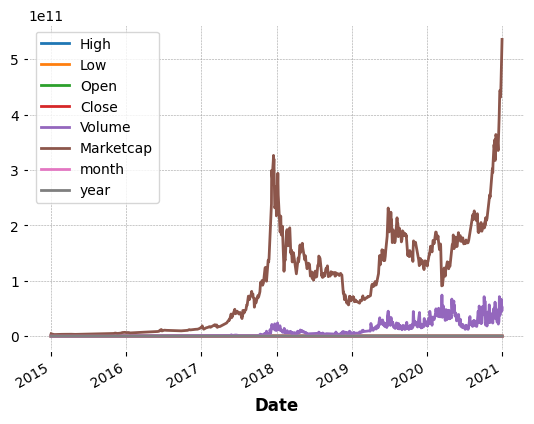

In [14]:
# Import libraries
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

# Set the Month column as index and convert it into Datetime Object
df.set_index('Date', inplace = True)
df.index = pd.to_datetime(df.index)

# Drop null values
df.dropna (inplace = True)

df.plot()

### The Decompose
A useful abstraction for choosing a forecasting method is to decompose the time series into systematic and unsystematic components.

**- Systematic:** Components of the time series that have consistency or recurrence and can be described and modeled.<br> **- Non-Systematic:** Components of the time series that cannot be directly modeled.

A given time series is considered to be composed of three system components, including level, trend, seasonality, and non-system components called noise.

These components are defined as follows:

**- Level:** The average value in the series.<br>**- Trend:** The increasing or decreasing value in the series.<br>**- Seasonality:**The repeating short-term cycle in the series.<br>**- Noise:** The random variation in the series.


<Figure size 640x480 with 0 Axes>

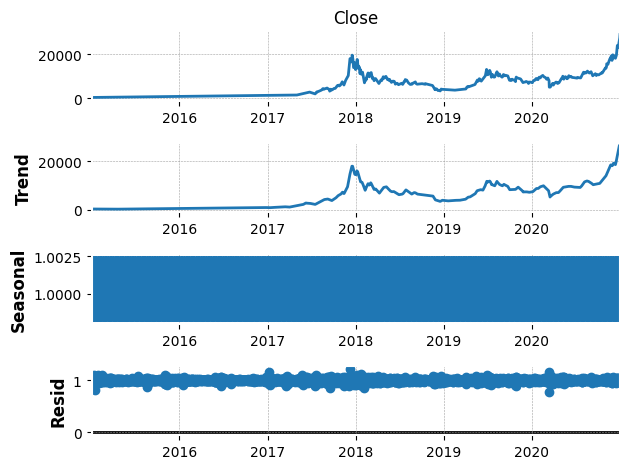

In [15]:
# From:
# https://ourcodingclub.github.io/tutorials/pandas-time-series/
# Plotting the decomposed time series to interpret.
b_result = seasonal_decompose(df['Close'], model = 'multiplicative')
b_fig = plt.figure()
b_fig = b_result.plot()
plt.rcParams['figure.figsize'] = (20, 12)

The trend and seasonality information collected from the series seem to be appropriate. The residuals are particularly fascinating, revealing periods of considerable fluctuation in the series' early and later years.

Text(0, 0.5, 'Closing Price')

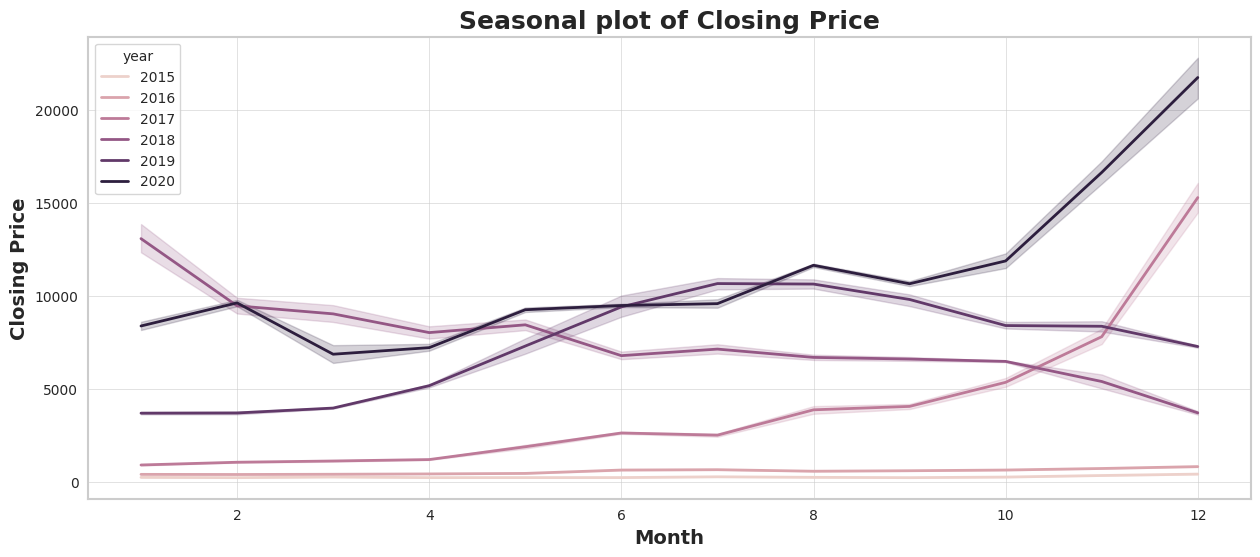

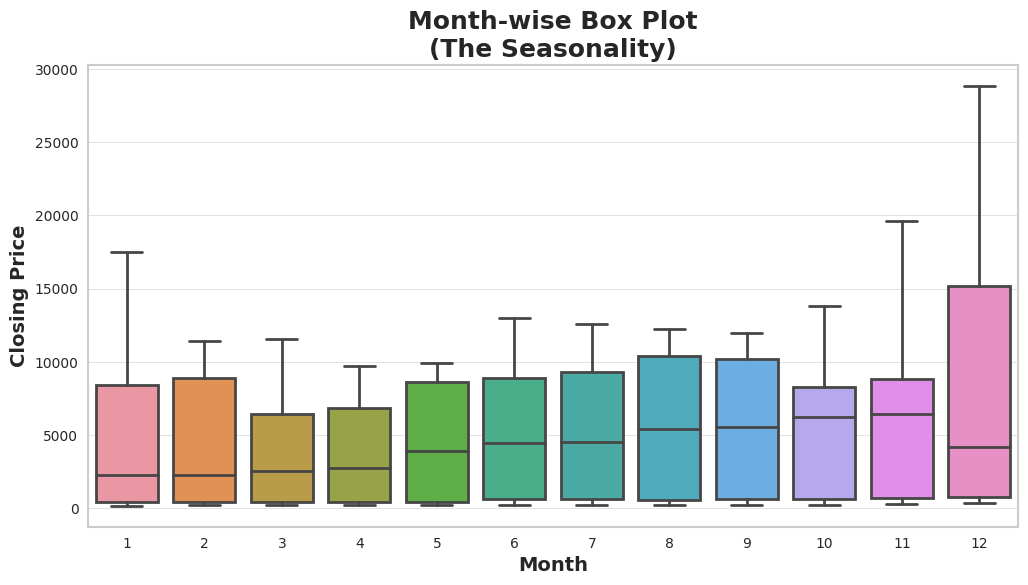

In [16]:
# From:
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/
# Seasonal plots
import seaborn as sns
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(df['month'], df['Close'], hue=df['year'])
ax.set_title('Seasonal plot of Closing Price', fontsize = 18, loc = 'center', fontdict = dict(weight = 'bold'))
ax.set_xlabel('Month', fontsize = 14, fontdict = dict(weight = 'bold'))
ax.set_ylabel('Closing Price', fontsize = 14, fontdict = dict(weight = 'bold'))

fig, ax = plt.subplots(figsize = (12,6))

sns.boxplot(df['month'], df['Close'], ax = ax)
ax.set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 18, loc = 'center', fontdict = dict(weight = 'bold'))
ax.set_xlabel('Month', fontsize = 14, fontdict = dict(weight = 'bold'))
ax.set_ylabel('Closing Price', fontsize = 14, fontdict = dict(weight = 'bold'))


According to the seasonal plot above, there is no pattern repeat within a given year, every year. Overall, though, bitcoin prices are increasing as the years pass.<br>The month-by-month dsitributions are shown in the boxplots. In addition, when looking at a month-by-month boxplot, the months of January, November and December obviously have increased the bitcoin price.

### The Violin Plot
A violin plot is a type of quantitative data visualization. It's similar to a box plot, however on each side there's a rotating kernel density plot.<br>Violin plots are similar to box plots in that they display the probability density of the data at various values, which is normally smoothed using a kernel density estimator. Typically, a violin plot will include all of the data included in a box plot: a marker for the data's median; a box or marker representing the interquartile range; and, assuming the number of samples is not too large, all sample points.<br>A violin plot is more useful than a simple box plot. The violin plot shows the whole distribution of the data, whereas a box plot simply gives summary statistics like mean/median and interquartile ranges. When the data distribution is multimodal, the distinction is very useful (more than one peak). In this scenario, a violin plot depicts the presence of many peaks, as well as their relative amplitude and location.

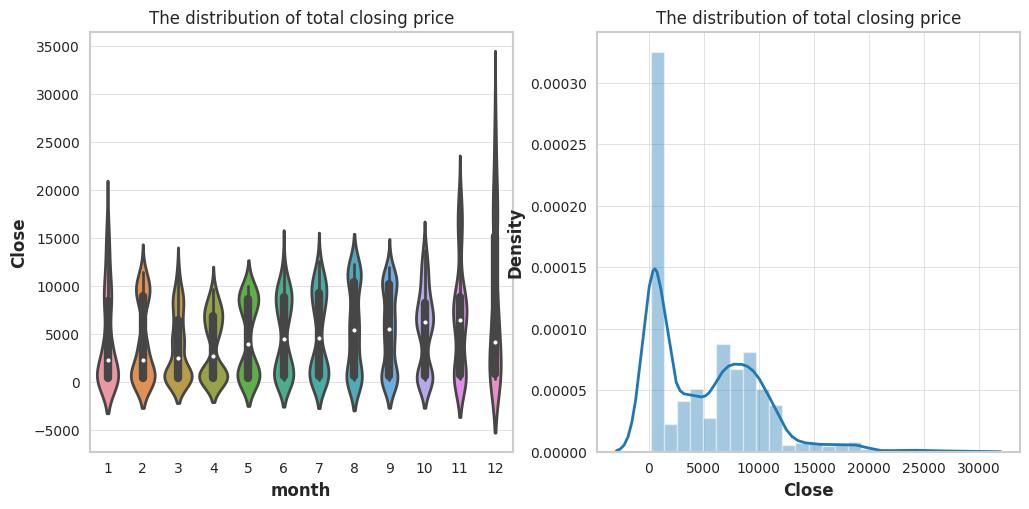

In [17]:
# From:
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
# Visualising the distribution map of the data distribution
plt.figure(figsize=(12,12))
scatter_para = {'marker':'.', 's':3, 'alpha':0.3}
line_kws = {'color':'k'}
plt.subplot(2,2,1)
plt.title('The distribution of total closing price')
sns.violinplot (x = 'month', y = 'Close', data = df, scatter_kws=scatter_para, line_kws=line_kws)
plt.subplot(2,2,2)
plt.title('The distribution of total closing price')
sns.distplot(df['Close'])

plt.show()

We see that the overall shape and distribution of the tips are similar from Febuary to October and their quartiles are very close to each other. However, more outliers in January, November and December.

### Augmneted Dickey-Fuller test
An augmented Dickey–Fuller test (ADF) in statistics and econometrics tests the null hypothesis that a unit root exists in a time series sample. Depending on which version of the test is employed, the alternative hypothesis is generally stationarity or trend-stationarity. For a bigger and more intricate set of time series models, it is an enhanced version of the Dickey–Fuller test.<br>The test's augmented Dickey–Fuller (ADF) statistic is a negative value. The greater the rejection of the hypothesis that there is a unit root at whatever degree of confidence, the more negative it is.<br>The ADF test follows the same technique as the Dickey–Fuller test, except it is applied to a model.
***<div align="center">Δyt=α+βt+γyt−1+δ1Δyt−1+δ2Δyt−2+…</div>***

The hypothesis we assume:<br>
>**- Null Hypothesis:** The series has a unit root (value of a =1)

>**- Alternate Hypothesis:** The series has no unit root.

If the null hypothesis is not rejected, the series is said to be non-stationary. The series might be linear or difference stationary as a result of this.<br>
We will define what adf test is. Firstly, we add the ADF execution through a function called adf_test. The Akaike Information Criterion (AIC) is for justifying the lag. The adfuller function produces a tuple of ADF test statistics, including the Test Statistic, P-Value, Number of Lags Used, Number of Observations Used for ADF Regression, and a dictionary of Critical Values. <br>We reject the Null Hypothesis that the time series has a unit root if the P-Value is less than the stated Significance Level. In other words, we may conclude that the time series is stationary by rejecting the Null hypothesis. You may utilize the Critical Values to assist you form a judgment about the stationarity of your time series if the P-Value is extremely near to your significance threshold.

The ADF test yields the following results: test statistic, p value, and critical value at 1%, 5%, and 10% confidence intervals. The following are the findings of our test for this particular series:

In [18]:
# ADF Test
# Import the required statsmodule for ADF Test
# From:
# https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/
import statsmodels
from statsmodels.tsa.stattools import adfuller

#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(df['Close'])

Results of Dickey-Fuller Test:
Test Statistic                    1.211980
p-value                           0.996068
#Lags Used                       26.000000
Number of Observations Used    2164.000000
Critical Value (1%)              -3.433375
Critical Value (5%)              -2.862877
Critical Value (10%)             -2.567482
dtype: float64


P-value of 0.996 is greater than out 5% significance level. As a result, we are unable to reject the null hypothesis that unit root exists. Because the test statistic is greater than the critical value, ther series is not stationary. 

In [19]:
# Time series statistical measures
from scipy import stats
print('Mean:', df['Close'].mean())
print('Standard deviation:', df['Close'].std())
print('Trimmed mean:', stats.trim_mean(df['Close'], 0.1))

Mean: 5144.893949588331
Standard deviation: 4814.814692749637
Trimmed mean: 4590.836579329322


### Autocorrelation Plot
Autocorrelation plots are a typical method for ensuring that a data collection is random. Autocorrelations for data values at different time delays are used to determine randomness. For any and all time-lag separations, such autocorrelations should be near zero if they are random. If the data isn't random, one or more of the autocorrelations will be non-zero.<br>It's important to remember that uncorrelated does not always imply random. Data with a lot of autocorrelation isn't random. Data that does not demonstrate considerable autocorrelation, on the other hand, might nonetheless reveal non-randomness in other ways. Autocorrelation is only one type of randomness metric. Checking for autocorrelation is often an adequate test of randomness in the context of model validation (which is the major sort of randomness we discuss in the Handbook), because residuals from poorly fitting models tend to reveal non-subtle unpredictability. Some applications, however, need a more precise definition of randomness. In these circumstances, a battery of tests is used, which may involve screening for autocorrelation, because data can be non-random in a variety of ways, some of which are subtle.

Autocorrelation plots are formed by:<br>
- Vertical axis: Autocorrelation coefficient
_**<div align="center">Rh=Ch/C0</div>**_
where Ch is the autocovariance function

_**<div align="center">Ch=1N∑t=1N−h(Yt−Y¯)(Yt+h−Y¯)</div>**_

and C0 is the variance function

_**<div align="center">C0=∑Nt=1(Yt−Y¯)2N</div>**_
Note that Rh is between -1 and +1.

Note that some sources may use the following formula for the autocovariance function

_**<div align="center">Ch=1N−h∑t=1N−h(Yt−Y¯)(Yt+h−Y¯)</div>**_
- Horizontal axis: Time lag h (h = 1, 2, 3, ...)

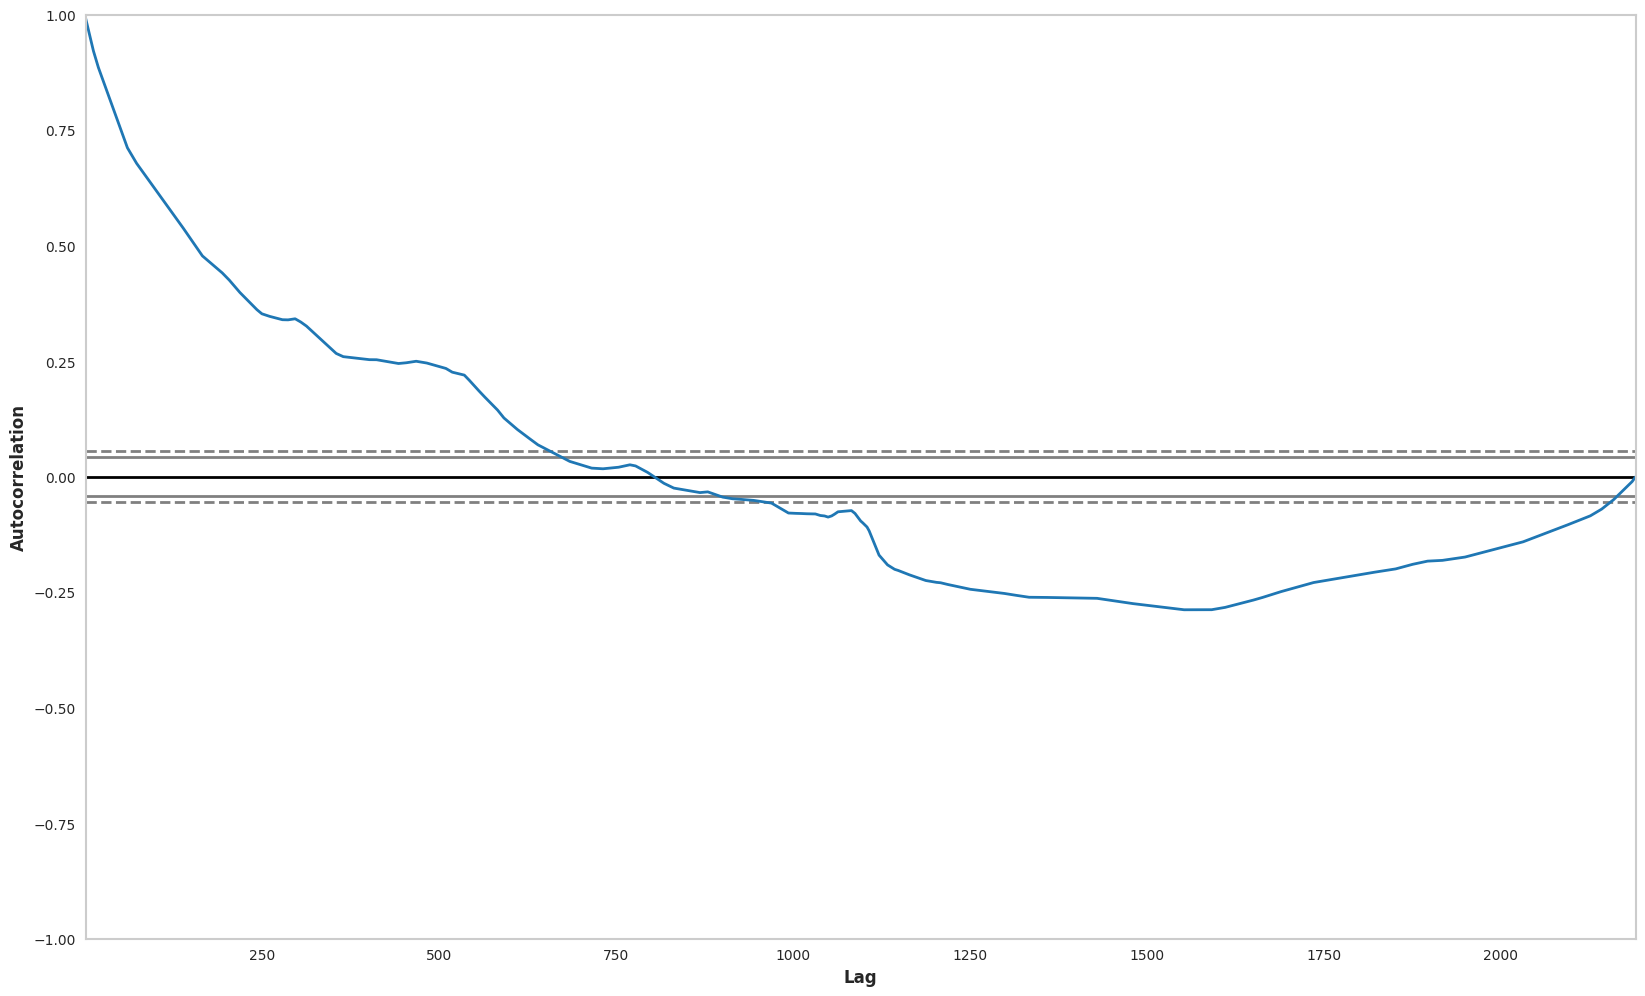

In [20]:
# From:
# https://www.geeksforgeeks.org/autocorrelation-plot-using-matplotlib/
# Create an autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Close'])
plt.show()

## Forcasting

In this section, I will use simple regression to predict the closing price by using a straight line.
### Simple regression
A linear regression model with a single explanatory variable is known as simple linear regression in statistics. That is, it processes two-dimensional sample points with independent variables and dependent variables (usually the x and y coordinates in the Cartesian coordinate system), and finds a linear function (non-vertical straight line) to predict the dependent variable based on the independent variable as much as possible Value. The term simple denotes that the outcome variable is associated with a single predictor.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

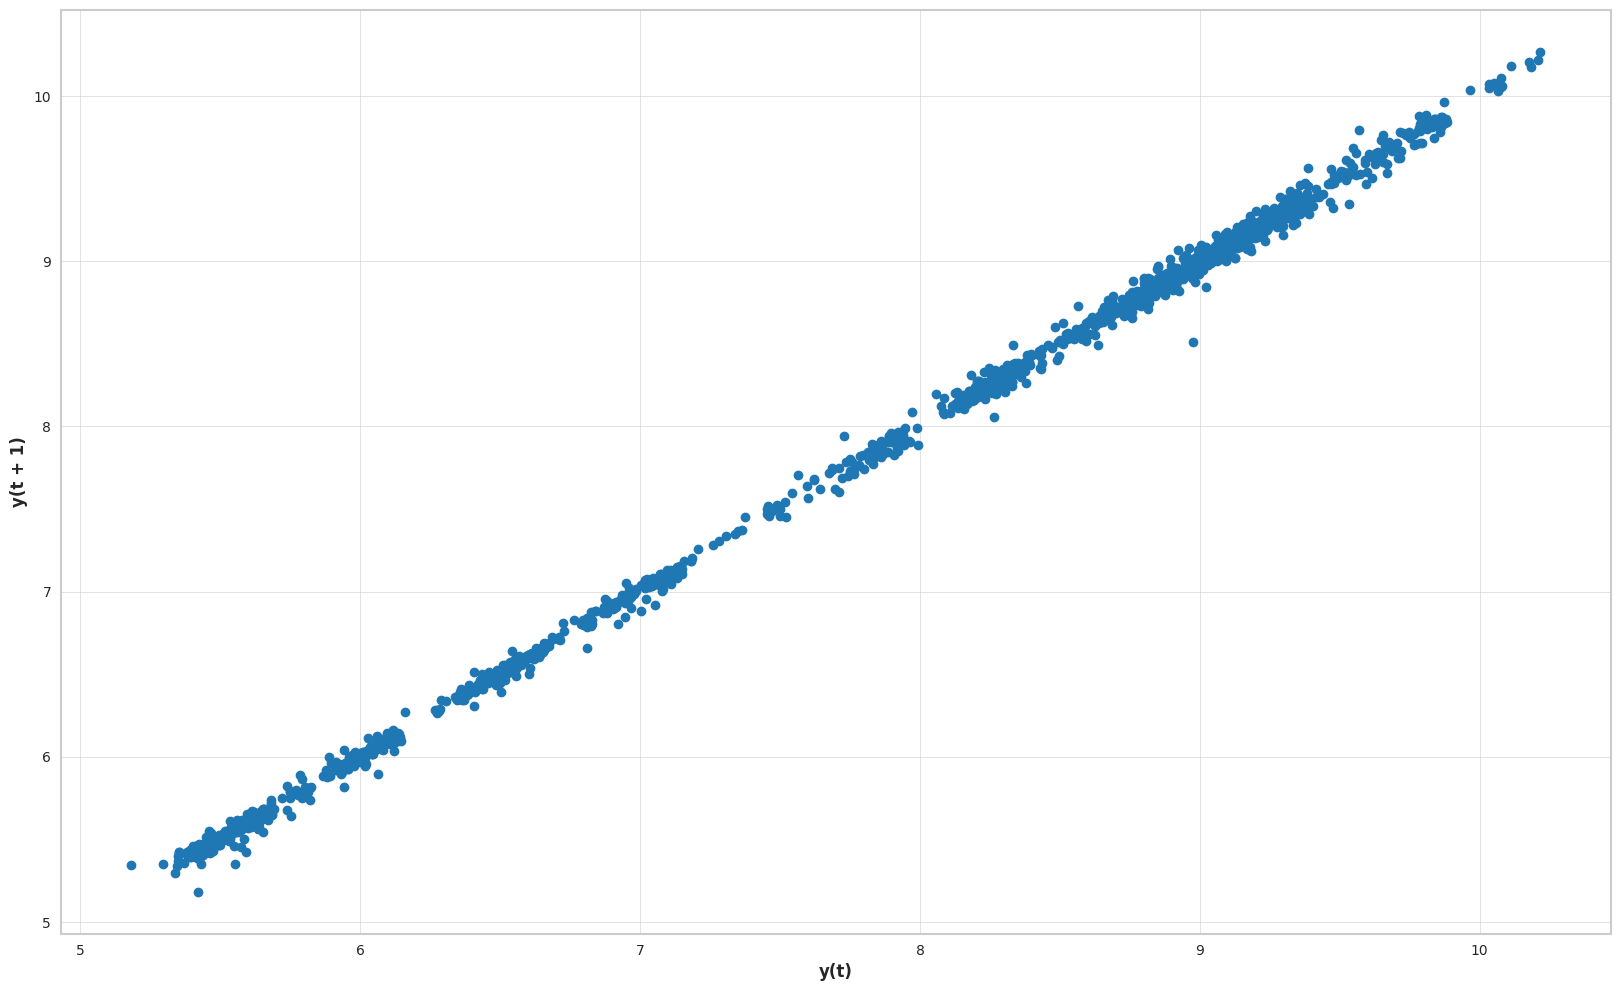

In [32]:
# Time series lag scatter plots
from pandas.plotting import lag_plot
lag_plot(np.log(df['Close']))

In [22]:
# Correlation
df.corr()

,High,Low,Open,Close,Volume,Marketcap,month,year
High,1.000000,0.998053,0.998964,0.999100,0.740867,0.996941,0.216830,0.786224
Low,0.998053,1.000000,0.998475,0.998935,0.742344,0.998223,0.219655,0.799613
Open,0.998964,0.998475,1.000000,0.997921,0.740464,0.996292,0.216694,0.792558
Close,0.999100,0.998935,0.997921,1.000000,0.741173,0.998514,0.218885,0.790935
Volume,0.740867,0.742344,0.740464,0.741173,1.000000,0.761716,0.055500,0.801828
Marketcap,0.996941,0.998223,0.996292,0.998514,0.761716,1.000000,0.223033,0.802101
month,0.216830,0.219655,0.216694,0.218885,0.055500,0.223033,1.000000,-0.001412
year,0.786224,0.799613,0.792558,0.790935,0.801828,0.802101,-0.001412,1.000000


It is more often than not furthermore stipulated to utilize the ordinary linear regression (OLS): the exactness of each anticipated esteem is decided by its remaining square (the vertical separate between the information set point and the fitted line) and the objective is to create the entirety of these square deviations as little as conceivable.
In a linear regression model, the equation is written as:
_**<div align="center">Y = a + bX +e</div>**_

In [23]:
# From:
# https://matthew-brett.github.io/cfd2020/classification/single_multiple.html
# Import the library for performing ordinary linear regression
import statsmodels.formula.api as smf
simple_model = smf.ols(formula='Close~year', data=df)

In [24]:
simple_fit = simple_model.fit()
simple_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     3657.
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        18:48:42   Log-Likelihood:                -20611.
No. Observations:                2191   AIC:                         4.123e+04
Df Residuals:                    2189   BIC:                         4.124e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.493e+06   7.44e+04    -60.407      0.000   -4.64e+06   -4.35e+06
year        2229.4653     36.865     60.476      0.000    2157.171    2301.760
==============================================================================
Omnibus:                      935.594   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5475.564
Skew:                           1.937   Prob(JB):                         0.00
Kurtosis:                       9.707   Cond. No.                     2.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multiple Regression
Multiple linear regression (MLR), often known as multiple regression, is a statistical methodology that predicts the result of a response variable by combining numerous explanatory factors. MLR aims to represent the linear connection between the explanatory (independent) factors and the response (dependent) variable.<br>Because it incorporates more than one explanatory variable, multiple regression is essentially an extension of ordinary least-squares (OLS) regression. And the formula and Calculation of Multiple Linear Regression:
_**<div align="center">yi=β0+β1xi1+β2xi2+...+βpxip+ϵ</div>**_

We hope to find the best-fit slopes using the training set by utilizing the whole dataset. Moreover, an intercept is allowed in this method.

In [25]:
# from:
# https://matthew-brett.github.io/cfd2020/classification/single_multiple.html
def predict(intercept, slopes, row):
    """ Predict a value given an intercept, slopes and corresponding row values
    """
    return intercept + np.sum(slopes * np.array(row))

In [26]:
# from:
# https://matthew-brett.github.io/cfd2020/classification/single_multiple.html
def rmse(intercept, slopes, attributes, y_values):
    """ Root mean square error for prediction of `y_values` from `attributes`

    Use `intercept` and `slopes` multiplied by `attributes` to give prediction.

    `attributes` is a data frame with numerical attributes to predict from.
    """
    errors = []
    for i in np.arange(len(y_values)):
        predicted = predict(intercept, slopes, attributes.iloc[i])
        actual = y_values.iloc[i]
        errors.append((actual - predicted) ** 2)
    return np.sqrt(np.mean(errors))

We will calculate the root mean square error for an intercept of 1, and slopes for year and Close of 0 and 0.

In [27]:
rmse(1, [0, 0], df.loc[:, 'year':], df['Close'])

7044.96307529319

In [28]:
def rmse_for_params(params):
    """ RMSE for intercept, slopes contained in `params`

    `params[0]` is the intercept.  `params[1:]` are the slopes.
    """
    intercept = params[0]
    slopes = params[1:]
    return rmse(intercept,
                slopes,
                df.loc[:, 'year':],
                df['Close']
               )

In [29]:
def rmse_fast(intercept, slopes, attributes, y_values):
    # Make an n by s array of slopes by copying the s slopes array n times.
    slopes_array = np.tile(slopes, [len(y_values), 1])
    # Multiply the n by s array by the corresponding attributes.
    slopes_fitted = np.sum(slopes_array * attributes, axis=1)
    predicted = intercept + slopes_fitted
    errors = y_values - predicted
    return np.sqrt(np.mean(errors ** 2))

The minimize can now be used for finding the intercept and two slopes that reduce the RMSE and SSE.

In [30]:
from scipy.optimize import minimize

min_css = minimize(rmse_for_params, [0,0,0])
min_css

      fun: 2945.5286961344577
 hess_inv: array([[ 2.94629843e+03, -2.13627333e-03, -2.13618761e-03],
       [-2.13627324e-03,  5.00000531e-01, -4.99999469e-01],
       [-2.13618770e-03, -4.99999469e-01,  5.00000531e-01]])
      jac: array([0.        , 0.00036621, 0.00036621])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 287
      nit: 26
     njev: 69
   status: 2
  success: False
        x: array([-4.48087258e+06,  1.11177670e+03,  1.11177670e+03])

Lastly, we could use StatsModels for getting best-fit model to closing price as a function of year and as a function of volume. the intercept, slope of year and slope of volume will be fitted at the same time.

In [31]:
multi_model = smf.ols(formula="Close ~ year + Volume", data=df)
multi_fit = multi_model.fit()
multi_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     2101.
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        18:51:15   Log-Likelihood:                -20513.
No. Observations:                2191   AIC:                         4.103e+04
Df Residuals:                    2188   BIC:                         4.105e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.128e+06   1.19e+05    -26.286      0.000   -3.36e+06   -2.89e+06
year        1552.3174     59.007     26.307      0.000    1436.601    1668.034
Volume      1.085e-07   7.58e-09     14.312      0.000    9.37e-08    1.23e-07
==============================================================================
Omnibus:                      729.880   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3159.919
Skew:                           1.555   Prob(JB):                         0.00
Kurtosis:                       7.994   Cond. No.                     3.25e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Conclusion
To conclude, the findings, when seen as a whole, reflect the points raised in the paper's introduction. The predictions of the Bitcoin is doing bad due to the strong multicollinearity between variables. It could be caused by the highly unpredictable trend of the price and market unripeness for cryptocurrencies. The cryptocurrency market is a rapidly expanding canvas for trade and investment, which has attracted the attention of traders, investors, and entrepreneurs around the world, which is unprecedented in this century. It will assist chronicle the behavior and habits of such a lucratively demanding and fast increasing sector by giving comparison studies and insights from the pricing data of cryptocurrency marketplaces.<br>The goal of this study is to use regression-based analytic algorithms to forecast Bitcoin's price direction. Future research might look into different datasets with additional attributes that might help forecast a more accurate and dependable bitcoin price rate.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b310ec90-4030-47cd-8468-8db48800277d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>